In [25]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from IPython.display import Image

### 5.1.20

In [439]:
X = np.array([-0.7, -0.41, -0.2, 0.17, 0.46, 0.75, 1.04, 1.33, 1.62, 1.91, 2.2])
Y = np.array([-12.917, 3.619, 9.586, 7.949, 1.543, -8.057, -16.150, -20.562, -17.720, -6.2, 18.115])

In [440]:
def creat_pol(C):
    return lambda x : sum([C[i] * x**i for i in range(len(C))])

def creat_pol_pt(C, pt):
    return lambda x : sum([C[i] * (x - pt)**i for i in range(len(C))])

def lsm(X, Y, m):
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    return npl.solve(A.T.dot(A), A.T.dot(Y))

def sigma(X, Y, m):
    p = creat_pol(lsm(X, Y, m))
    return [np.sqrt(1/(len(X) - m) * sum([(creat_pol(lsm(X, Y, m))(X[i]) - Y[i])**2 for i in range(len(X))])) for m in range(m)]

def create_graph(f):
    plt.figure(figsize = (15, 7), dpi = 800)
    plt.scatter(X, Y)
    plt.xlabel('x')
    plt.ylabel('y')

    y_ = f(X)
    plt.plot(X, y_)
    #plt.legend()

In [441]:
print(sigma(X, Y, 11))

[12.117769486949443, 12.639563957204533, 12.604166852581761, 0.28595887049090996, 0.2961515616582487, 0.28891406930175734, 0.29405443237715906, 0.32570907249954845, 0.2732963874319829, 0.28318024377947365, 1.747496470942625e-05]


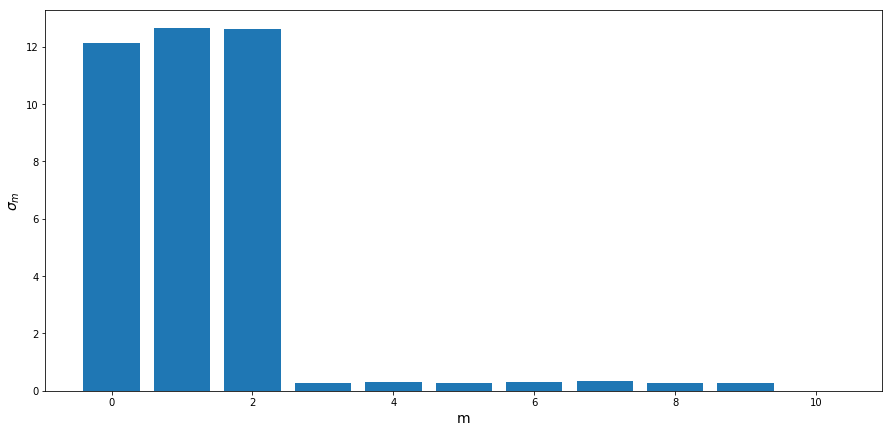

In [442]:
sigmas_QR = sigma(X, Y, 11)

plt.figure(figsize = (15, 7))
plt.bar(range(11), sigmas_QR)
plt.xlabel('m', fontsize = 14)
plt.ylabel('$\sigma_m$', fontsize = 14);

### 5.7.1

In [443]:
a = -np.pi
b = np.pi
k = 15
def f(x):
    return np.abs(np.sin(x))

In [444]:
def lin_interpol(p1, p2, t):
    return (p2[1] - p1[1])/(p2[0] - p1[0]) * (t - p1[0]) + p1[1]

def f_ind(X, t):
    i = 0
    while X[i] < t:
            i += 1
    if i == 0:
        i += 1
    return i - 1

def norm_lin_interpol(X, Y):
    return lambda t : lin_interpol((X[f_ind(X, t)], Y[f_ind(X, t)]), (X[f_ind(X, t) + 1], Y[f_ind(X, t) + 1]), t)

In [445]:
x1 = np.linspace(a,b,k)
x2 = np.linspace(a,b,2*k + 1)
x3 = np.linspace(a,b,3*k + 1)
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

In [446]:
y3_res = []
for i in range(3 * k):
    p1 = (x3[i], y3[i])
    p2 = (x3[i+1], y3[i + 1])
    y3_res.append(lin_interpol(p1, p2, x3[i]))

In [447]:
def chnod(a, b, k, n):
    return np.cos((2*k+1)/(2*n)*np.pi) * (b - a)/2 + (b + a)/2

def cycl1(x, y):
    n = x.shape[0]
    f = np.zeros((n, n))
    f[:, 0] = y
    for k in range(1, n):
        for i in range(n-k):
            f[i, k] = (f[i+1, k-1] - f[i, k-1]) / (x[i+k] - x[i])
    return (n, f, x, y)

def cycl2(nfxy, t):
    s = nfxy[3][0]
    r = 1
    for k in range(0, nfxy[0] - 1):
        r = r * (t - nfxy[2][k])
        s += nfxy[1][0, k + 1] * r
    return s

def new_interp(x, y):
    return lambda t : cycl2(cycl1(x, y), t)

In [448]:
interp1 = new_interp(x3, y3)

#### Интерполяция полиномом Ньютона

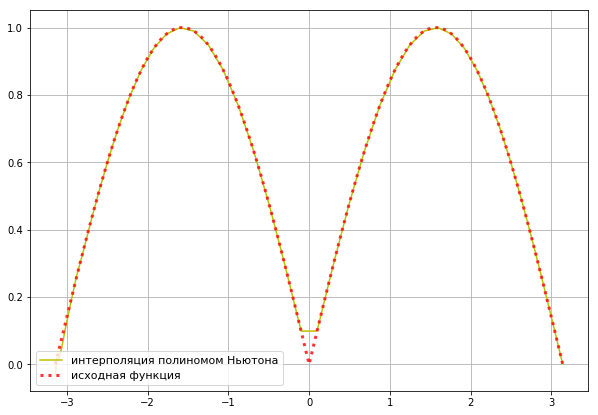

In [449]:
n = 50

X1 = list(chnod(-np.pi, np.pi, np.arange(n), n))
X1 = np.array(X1)
Y1 = f(X1)

ls1 = np.linspace(a, b, 20000)
plt.figure(figsize=(10, 7))
plt.plot(chnod(-np.pi, np.pi, np.arange(n), n), new_interp(X1, Y1)(chnod(-np.pi, np.pi, np.arange(n), n)), label='интерполяция полиномом Ньютона', linestyle = '-', color = 'y', alpha = 1, linewidth = 1.5)
plt.plot(ls1, f(ls1), label='исходная функция', linestyle = ':', color = 'r', alpha = 0.8, linewidth = 3)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

#### Линейная интерполяция

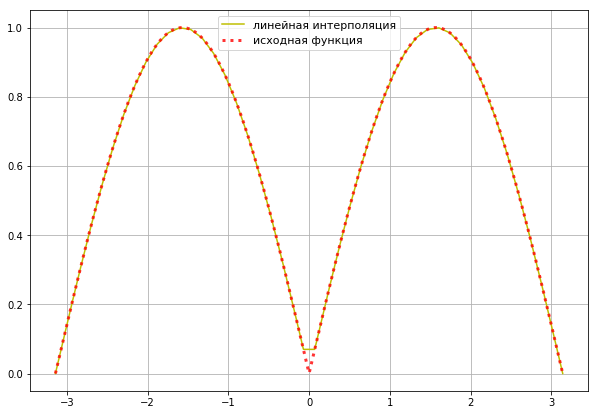

In [450]:
plt.figure(figsize=(10, 7))

l1 = np.linspace(a,b,2000)

plt.plot(l1, [norm_lin_interpol(x3, y3)(x) for x in l1], label='линейная интерполяция', linestyle = '-', color = 'y', alpha = 1, linewidth = 1.5)
plt.plot(l1, f(l1), label='исходная функция', linestyle = ':', color = 'r', alpha = 0.8, linewidth = 3)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

#### Погрешность

In [451]:
lin_interpol1 = norm_lin_interpol(x3, y3)
x_test = np.array([(x3[i] + x3[i+1])/2 for i in range(x3.shape[0] - 1)])
y_test = np.abs(f(x_test) - [lin_interpol1(x) for x in x_test])

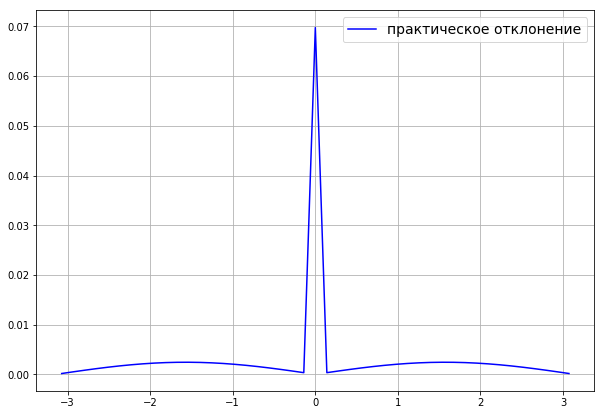

In [452]:
plt.figure(figsize=(10, 7))
plt.plot(x_test, y_test, label='практическое отклонение', linestyle = '-', color = 'b', alpha = 1)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

### 5.9.10

#### Глобальная интерполяция

In [453]:
a2, b2 = 3, 3.5
def f2(x):
    return np.sin(x**3)/x

def glob_interpol(f, n, patition_f, *args):
    node = patition_f(*args)
    f_node = f(node)
    
    v = np.ones(len(node))
    for i in range(1, len(node)):
        v = np.vstack((v,node**i))
    V = v.T
    c = np.linalg.solve(V, f_node)
    
    return creat_pol(c)

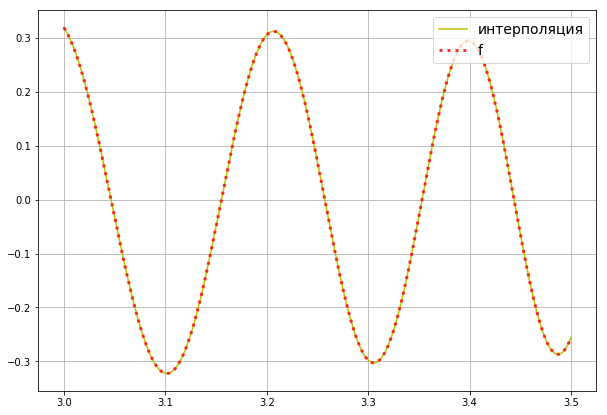

In [454]:
#p1 = glob_interpol(4)
n3 = 150
p1 = glob_interpol(f2, n3, chnod, a2, b2, np.arange(n3), n3)
l1 = np.linspace(a2,b2,2000)

plt.figure(figsize=(10, 7))
plt.plot(l1, p1(l1), label='интерполяция', linestyle = '-', color = 'y', alpha = 1, linewidth = 1.5)
plt.plot(l1, f2(l1), label='f', linestyle = ':', color = 'r', alpha = 0.8, linewidth = 3)
plt.legend(fontsize=14, loc = 1)
plt.grid(True)
plt.show()

#### Сплайн интерполяция. Фундаментальный сплайн

In [503]:
n3 = 30

def f3_1(x):
    return 3*x*np.cos(x**3) - np.sin(x**3)/x**2

def f3_2(x):
    return -(6559*np.sin(x**3)) / x**3

def f3_3(x):
    return -6559*np.cos(x**3) - (6563*np.sin(x**3)) / x**3

def spline_interpol(n, f, a_b, firest_der, second_der, nodes):
    a, b, c, d = np.zeros(n - 1), np.zeros(n - 1), np.zeros(n - 1), np.zeros(n - 1)
    a[0] = f(nodes[0])
    b[0] = firest_der
    c[0] = second_der / 2
    #d[0] = (f(nodes[1]) - a[0] - b[0]*(nodes[1] - nodes[0]) - c[0]*(nodes[1] - nodes[0])**2) / (nodes[1] - nodes[0])**3
    d[0] = f3_3(nodes[0])
    #if a_b == 'a':
        
    #for i in range(len(nodes) - 2):
    for i in range(len(nodes) - 2):
        a[i + 1] = f(nodes[i + 1]) #a[i] + b[i] * (nodes[i + 1] - nodes[i]) + c[i] * (nodes[i + 1] - nodes[i]) ** 2 + d[i] * (nodes[i + 1] - nodes[i]) ** 3
        b[i + 1] = b[i] + 2 * c[i] * (nodes[i + 1] - nodes[i]) + 3 * d[i] * (nodes[i + 1] + nodes[i])**2
        c[i + 1] = c[i] + 3 * d[i] * (nodes[i + 1] - nodes[i])
        d[i + 1] = (f(nodes[i + 2]) - a[i + 1] - b[i + 1] * (nodes[i + 2] - nodes[i + 1]) - c[i + 1] * (nodes[i + 2] - nodes[i + 1])**2) / (nodes[i + 2] - nodes[i + 1])**3

    return a, b, c, d

def get_coeffs(n, f, a_b, firest_der, second_der, nodes):
    return lambda t : [spline_interpol(n, f, a_b, firest_der, second_der, nodes)[i][f_ind(nodes, t)] for i in range(4)]

def novoe_nazvanie(*args): # args = (n, f, a_b, firest_der, second_der, nodes)
    return lambda t : creat_pol_pt(get_coeffs(*args)(t), args[5][f_ind(args[5], t)])(t)

In [504]:
first_der = 9 * np.cos(27) - np.sin(27) / 9
second_der = -6559 * np.sin(27) / 27
sp1 = get_coeffs(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, 10))
sp1(3)

[0.31879197613483434,
 -2.7355132706494705,
 -116.16425397046548,
 1683.6682532215739]

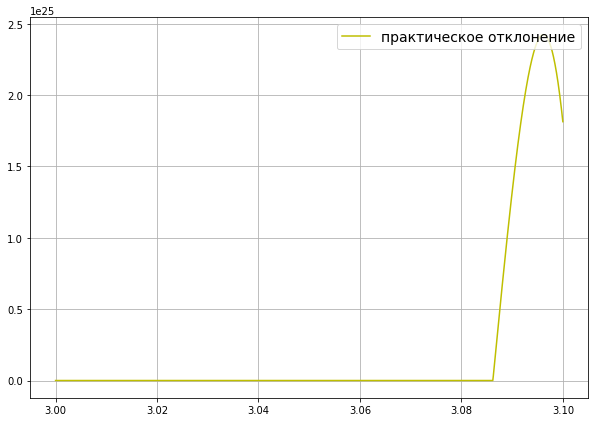

-0.04781294766899454

In [507]:
l1 = np.linspace(a2,b2-0.4,2000)

a = spline_interpol(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, n3))[0][3]
b = spline_interpol(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, n3))[1][3]
c = spline_interpol(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, n3))[2][3]
d = spline_interpol(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, n3))[3][3]

plt.figure(figsize=(10, 7))
#plt.plot(l1, f2(l1), label='f', linestyle = ':', color = 'r', alpha = 0.8, linewidth = 3)
plt.plot(l1, [novoe_nazvanie(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, n3))(x) for x in l1], label='практическое отклонение', linestyle = '-', color = 'y', alpha = 1, linewidth = 1.5)
#plt.plot(l1, [creat_pol_pt([a, b, c, d], a2 + *(b2 - a2)/(n3-1))(x) for x in l1], label='пажилое отклонение', linestyle = '-', color = 'y', alpha = 1, linewidth = 1.5)
plt.legend(fontsize=14, loc = 1)
plt.grid(True)
plt.show()
creat_pol_pt([a, b, c, d], a2)(a2)

In [508]:
spline_interpol(n3, f2, 'a', first_der, second_der, np.linspace(a2, b2, n3))

(array([ 0.31879198,  0.2391647 ,  0.10758369, -0.04781295, -0.19219732,
        -0.29176235, -0.32189029, -0.27379544, -0.1577763 , -0.00184735,
         0.15440707,  0.26962753,  0.31182156,  0.26785886,  0.14840535,
        -0.01365131, -0.17151923, -0.27774709, -0.29879383, -0.22642975,
        -0.08193495,  0.08905144,  0.23027136,  0.29334396,  0.25502366,
         0.12692469, -0.04659922, -0.2028334 , -0.28313389]),
 array([-2.73551327e+000,  1.82875967e+005, -6.75939586e+010,
         2.52685843e+016, -9.55347139e+021,  3.65276056e+027,
        -1.41232173e+033,  5.52168412e+038, -2.18277161e+044,
         8.72403682e+049, -3.52511312e+055,  1.43995595e+061,
        -5.94593857e+066,  2.48176955e+072, -1.04700157e+078,
         4.46429986e+083, -1.92377856e+089,  8.37776768e+094,
        -3.68679611e+100,  1.63943355e+106, -7.36612300e+111,
         3.34396226e+117, -1.53369167e+123,  7.10634550e+128,
        -3.32631710e+134,  1.57277929e+140, -7.51167300e+145,
         3.6236

In [431]:
creat_pol([40,1,1,1])(a2)

79

<img src="https://pbs.twimg.com/media/DTpRwlQW0AIutJS.jpg:small" style="width:200px">
<h1><center><font size="5" color="blue" face="Socket">שְׁמַע יִשְׂרָאֵל יְהוָה אֱלֹהֵינוּ יְהוָה אֶחָֽד</font></center></h1>
